# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

* Load the data set
* Explore, summarize and visualize the data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Summarize the results with a written report

(http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset)

---
## Step 0: Load The Data

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

In [1]:
# Load pickled data
import pickle
import os

dirpath = os.getcwd()
foldername = os.path.basename(dirpath)

training_file = dirpath + "/data/train.p"
validation_file= dirpath + "/data/valid.p"
testing_file = dirpath + "/data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

#### Load the names of y labels

In [2]:
import pandas as pd
sign_data = pd.read_csv('signnames.csv')

In [3]:
import numpy as np

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

n_train = len(X_train)

n_validation = len(X_valid)

n_test = len(X_test)

image_shape = X_test.shape[1:3]

distinct_classes = set(np.hstack((y_test, y_valid, y_train)))
n_classes = len(distinct_classes)
max_class = max(distinct_classes)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of validation examples =", n_validation)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)
print("Highest class =", max_class)

print("Names of traffic signs:")
print(sign_data["SignName"])

Number of training examples = 34799
Number of testing examples = 12630
Number of validation examples = 4410
Image data shape = (32, 32)
Number of classes = 43
Highest class = 42
Names of traffic signs:
0                                  Speed limit (20km/h)
1                                  Speed limit (30km/h)
2                                  Speed limit (50km/h)
3                                  Speed limit (60km/h)
4                                  Speed limit (70km/h)
5                                  Speed limit (80km/h)
6                           End of speed limit (80km/h)
7                                 Speed limit (100km/h)
8                                 Speed limit (120km/h)
9                                            No passing
10         No passing for vehicles over 3.5 metric tons
11                Right-of-way at the next intersection
12                                        Priority road
13                                                Yield
14            

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

#### Check for balanced classes

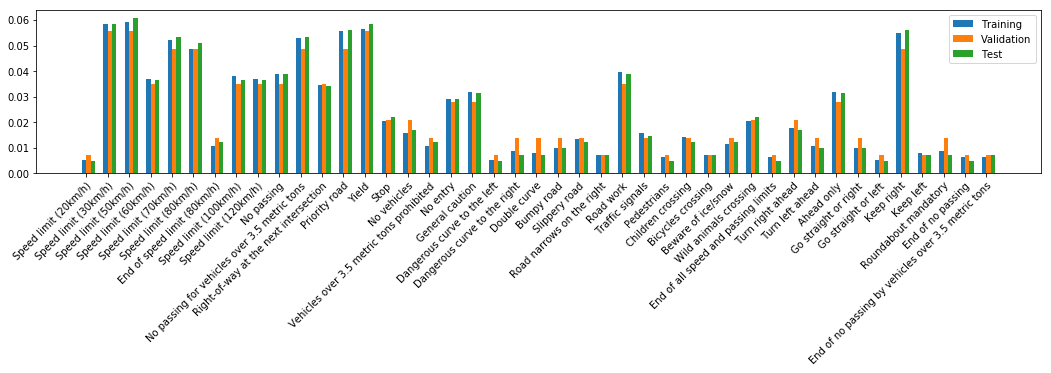

In [4]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

data_set_charts = map(lambda data_set: np.histogram(data_set, n_classes, density=True)[0], [y_train, y_valid, y_test])
data_set_labels = ["Training", "Validation", "Test"]

names = list(sign_data["SignName"])

fig = plt.figure(figsize=(18,3))
ax = plt.subplot(111)

# Position and width of the bars
width=0.2
bins = list(map(lambda x: x-width/2,range(1,n_classes+1)))

# Plot the bar charts next to each other
for i, data in enumerate(data_set_charts):
    ax.bar(np.add(bins,i*width), data, width=width, label=data_set_labels[i])

# Add the x_tick labels
ax.set_xticks(list(map(lambda x: x, range(1,len(data)+1))))
ax.set_xticklabels(names,rotation=45, rotation_mode="anchor", ha="right")

plt.legend()
plt.show()

From the bar chart we see, that the number of samples is not balanced across the different classes. This may lead to a biased classificator. Remedy could be to collect more data for the underrepresented classes.

Comparing Test, Valid and Train data set are not quite equal, too. Some classes are under- or overrepresented compared to the other data sets.

#### Display a sample for each class

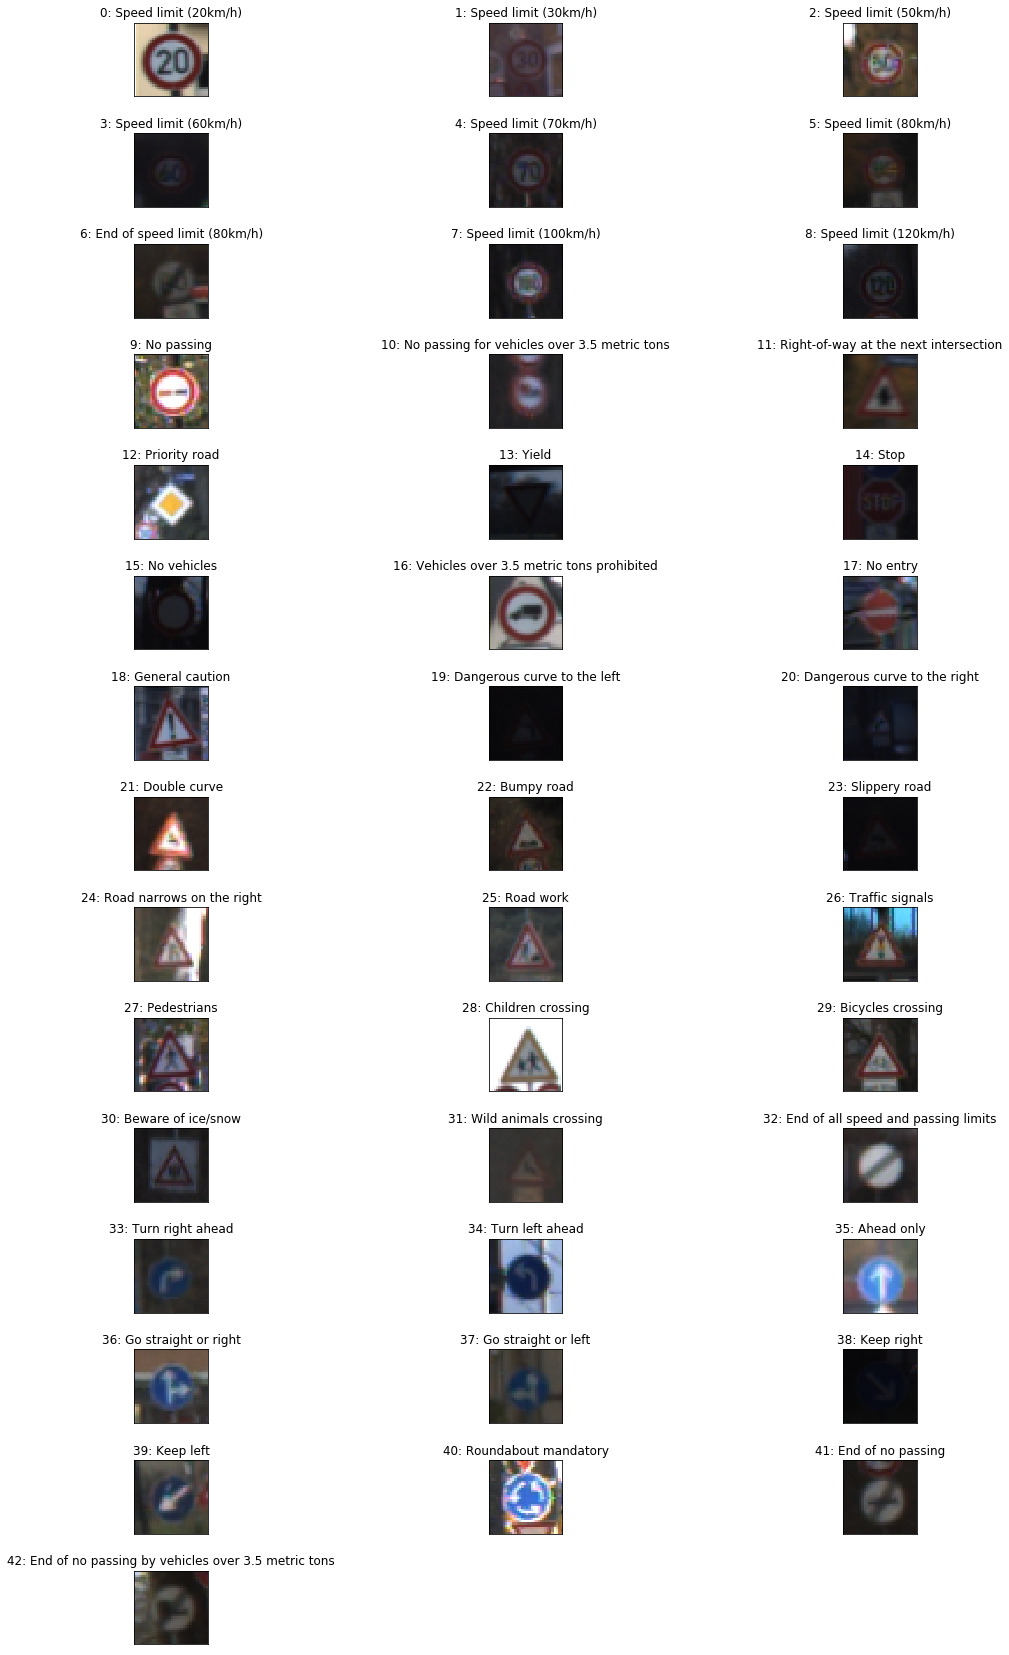

In [5]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(18,40))
fig.subplots_adjust(hspace=0.5)

for i in range(n_classes):
    pic_id = np.min(np.where(y_train==i))
    plt.subplot(20, 3, i+1), plt.xticks([]), plt.yticks([]),
    plt.title("{}: {}".format(i, sign_data.iloc[i]["SignName"])),
    plt.imshow(X_train[pic_id])

plt.show()

#### The average image on the training data

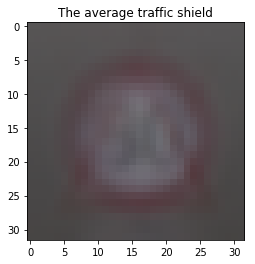

(<matplotlib.image.AxesImage at 0x114b134a8>,
 Text(0.5, 1.0, 'The average traffic shield'),
 None)

In [6]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
%matplotlib inline

mu = np.mean(X_test,axis=0)
std = np.std(X_test, axis=0)
plt.imshow(mu.astype(int)), plt.title("The average traffic shield"), plt.show()

The average image shows the bias in the training data, too. For example there are less blue signs, leading to the prevailing red in the average image.

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

#### Define methods for batching and normalizing the data sets

In [7]:
import cv2
class ImageGenerator(object):
    
    def __init__(self):
        pass
    
    """
    Transforms to HSV and modifies the V channel.
    """
    def _modify_value(self, _img):
        H, S, V = cv2.split(cv2.cvtColor(_img, cv2.COLOR_RGB2HSV))
        V_shift_factor = np.random.uniform(0.2,2.)
        # Multiply the Value channel with the factor
        V_new = np.multiply(V, V_shift_factor).astype("uint8")
        V_new = np.maximum(V_new, 0)
        V_new = np.minimum(V_new, 255)
        _img = cv2.cvtColor(cv2.merge([H, S, V_new]), cv2.COLOR_HSV2RGB)
        return _img
    
    def _modify_rotation(self, _img, cols=32, rows=32):
        angl = (2.0 * np.random.rand(1) - 1.0) * 20.
        M = cv2.getRotationMatrix2D(((cols - 1) / 2.0, (rows - 1) / 2.0), angl, 1)
        _img = cv2.warpAffine(_img, M, (cols, rows))
        return _img
    
    def _modify_perspective(self, _img, max_aff_trans=4, cols=32, rows=32):
        pts1 = np.float32([[8, 8],[8, 24],[24, 24], [24, 8]])
        
        s_1, s_2, s_3, s_4 = ((np.random.rand(1, 4)*2.0 - 1.0) * max_aff_trans)[0]
        pts2 = np.float32([[8+s_2, 8+s_1],[8, 24-s_1],[24-s_2, 24], [24, 8]])
        
        M = cv2.getPerspectiveTransform(pts1, pts2)
        _img = cv2.warpPerspective(_img, M, (cols, rows))
        return _img
    
    """
    Random translation of the input image,
    """
    def _modify_translation(self, _img, max_trans_pxl=5., cols=32, rows=32):
        t_x, t_y = ((np.random.rand(1, 2) - 0.5)* max_trans_pxl)[0]
        M = np.float32([[1,0,t_x],[0,1, t_y]])
        _img = cv2.warpAffine(_img, M, (cols, rows))
        return _img
    
    def generate_image(self, _img):
        pipeline = [self._modify_value,
                    self._modify_rotation,
                    self._modify_perspective,
                    self._modify_translation]
        
        for transformator in pipeline:
            _img = transformator(_img)
        return _img

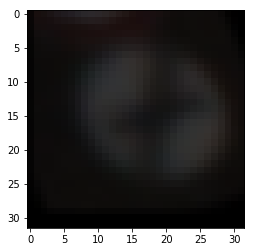

In [8]:
img_mod = ImageGenerator()
mod_img = img_mod.generate_image(X_train[0])
plt.imshow(mod_img)
plt.show()

In [91]:
from sklearn.utils import shuffle
import numpy as np
import cv2
class BatchGenerator(object):
    
    def __init__(self, _X, _y, min_augmentation_factor = 1, augmentation=True):
        self.X, self.y = shuffle(_X, _y)
        self.img_gen = ImageGenerator()
        self.augmentation = augmentation
        # Calculate the probability for each class
        # to augment the data set by a sample of this
        # class
        hist_density, _ = np.histogram(_y, n_classes)
        dense_sum = 1. - hist_density/(min_augmentation_factor*np.max(hist_density))
        self.class_weights = dense_sum / np.sum(dense_sum)
    
    def _augment_batch(self, X_batch, y_batch, aug_count=2000):
        # balance the classes
        # Draw random list of image labels that need to be augmented
        aug_classes = np.random.choice(list(range(0,n_classes)),
                                       size=aug_count,
                                       replace=True,
                                       p=self.class_weights)
        
        # Number of images to be generated for each class
        aug_cnts_per_class, _ = np.histogram(aug_classes, n_classes)
        
        # Lookup table for original images in the batch to use for augmentation
        originals = {label: np.where(y_batch == label)[0] for label in range(n_classes)}
        
        # Augment
        X_aug, y_aug = [], []
        for cur_class, aug_cnt in enumerate(aug_cnts_per_class):
            # draw source images as basis for augmenting the current class
            if len(originals[cur_class]) == 0:
                # No source images for this class available to augment!
                continue
                
            src_imgs_indices = np.random.choice(originals[cur_class], size=aug_cnt, replace=True)
            for src_imgs_index in src_imgs_indices:
                # Augment each drawn source image
                mod_img = self.img_gen.generate_image(X_batch[src_imgs_index])
                X_aug.append(mod_img)
                y_aug.append(cur_class)
        
        return X_aug, np.array(y_aug, dtype="uint8")
    
    def _visualize_augmentation(self, y_batch, y_aug):
        fig = plt.figure(figsize=(18,3))
        ax = plt.subplot(111)

        y_batch_hist, _ = np.histogram(y_batch, n_classes)
        y_aug_hist, _ = np.histogram(y_aug, n_classes)
        
        ax.bar(np.arange(n_classes), y_batch_hist)
        ax.bar(np.arange(n_classes), y_aug_hist, bottom=y_batch_hist)
        
        # Add the x_tick labels
        ax.set_xticks(list(map(lambda x: x, range(0,len(data)))))
        ax.set_xticklabels(names,rotation=45, rotation_mode="anchor", ha="right")
        plt.show()
    
    def next_batch(self, batch_size=1000):
        assert batch_size <= len(self.X)
        while 1:
            shuffle(self.X, self.y)
            for offset in range(0, len(self.X), batch_size):
                # get current batch
                _X = self.X[offset:offset+batch_size]
                _y = self.y[offset:offset+batch_size]
                    
                if self.augmentation:
                    X_aug, y_aug = self._augment_batch(_X, _y, aug_count=2000)
                    _X = np.concatenate((X_aug, _X))
                    _y = np.concatenate((y_aug, _y))
                    shuffle(_X, _y)
                yield _X, _y

In [92]:
batch_gen = BatchGenerator(X_train, y_train)

#for i in batch_gen.next_batch(augmentation=True):
#    break

In [89]:
class ImagePreprocessor(object):
    def __init__(self):
        pass
    
    def _grayscale(self, _img):
        _img = cv2.cvtColor(_img, cv2.COLOR_BGR2GRAY)
        return _img
    
    def _crop_center(self, _img, cols=32, rows=32):
        pts1 = np.float32([[4, 4],[4, 28],[28, 28], [28, 4]])
        pts2 = np.float32([[0, 0],[0, 32],[32, 32], [32, 0]])
        
        M = cv2.getPerspectiveTransform(pts1, pts2)
        _img = cv2.warpPerspective(_img, M, (cols, rows))
        return _img
    
    def _hist_normalization(self, _img):
        _img = cv2.equalizeHist(_img)
        return _img
    
    def _standardization(self, _img):
        mu = np.mean(_img)
        std = np.std(_img)
        _img = (_img - mu) / std
        return _img
    
    def preprocess_batch(self, _X):
        return [self.preprocess(_img) for _img in _X]
    
    def preprocess(self, _img):
        pipeline = [self._crop_center,
                    self._grayscale,
                    self._hist_normalization,
                    self._standardization]
        
        for func in pipeline:
            _img = func(_img)
        return _img

In [61]:
img_preproc = ImagePreprocessor()

X_test_preproc = [img_preproc.preprocess(i) for i in X_test]
X_train_preproc = [img_preproc.preprocess(i) for i in X_train]
X_valid_preproc = [img_preproc.preprocess(i) for i in X_valid]

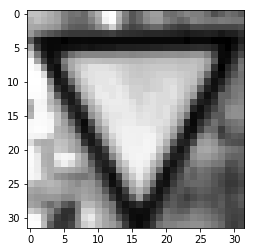

In [62]:
plt.imshow(X_test_preproc[133], cmap="gray")

#### Exploring the gray scaling

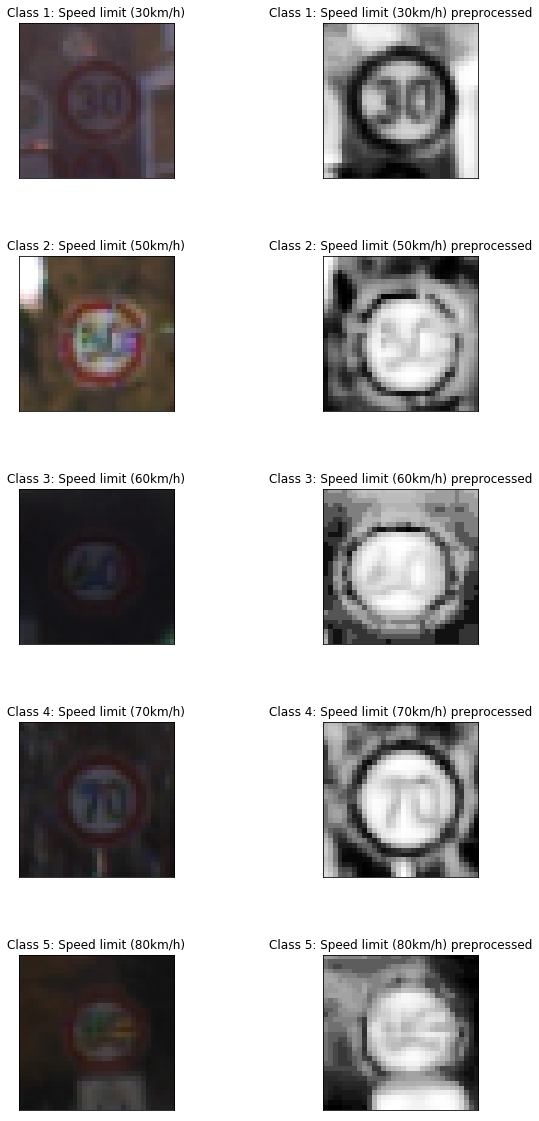

In [71]:
# import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,20))
fig.subplots_adjust(hspace=0.5)

pics_per_row = 2
num_pics = 5

pic_counter = 1
# Only for the first num_pics classes
for class_id in range(1,num_pics+1):
    
    pic_id = np.min(np.where(y_train==class_id))
    
    # Original image
    plt.subplot(num_pics, pics_per_row, pic_counter), plt.xticks([]), plt.yticks([])
    plt.title("Class {}: {}".format(class_id, sign_data.iloc[class_id]["SignName"])),
    pic_counter += 1
    plt.imshow(X_train[pic_id])
    plt.plot()
    
    # Preprocessed counter-part image
    plt.subplot(num_pics, pics_per_row, pic_counter), plt.xticks([]), plt.yticks([])
    plt.title("Class {}: {} preprocessed".format(class_id, sign_data.iloc[class_id]["SignName"])),
    pic_counter += 1
    plt.imshow(X_train_preproc[pic_id], "gray")
    plt.plot()

#### Display samples of normalized images to understand the processing steps

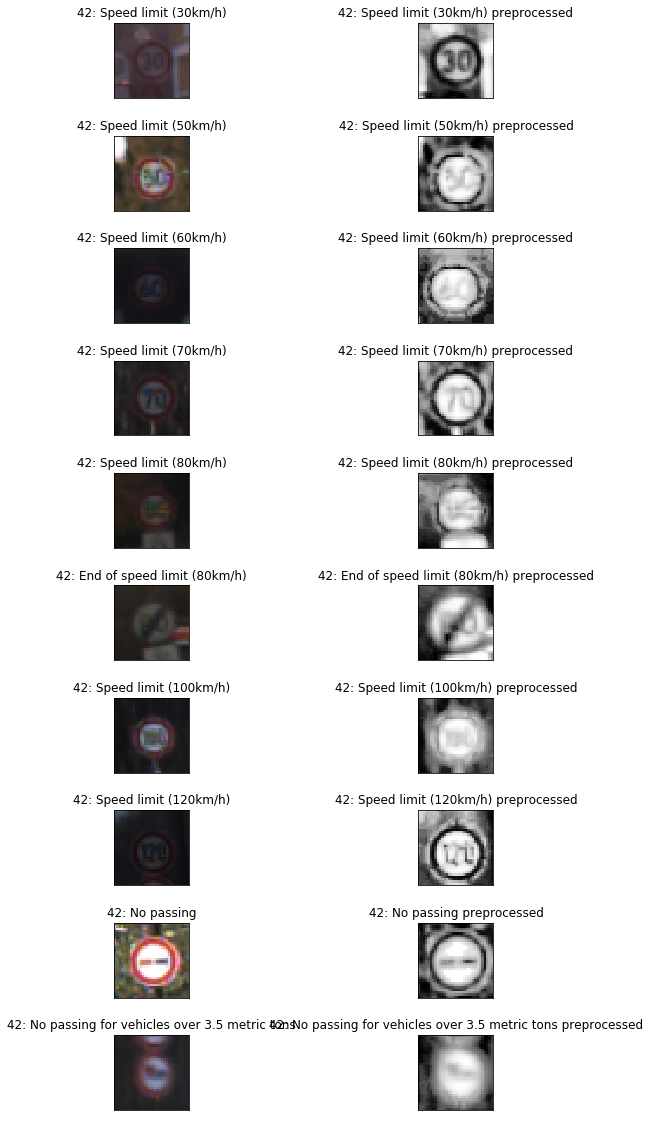

In [64]:
# import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,20))
fig.subplots_adjust(hspace=0.5)

pics_per_row = 2
num_pics = 10

pic_counter = 1
# Only for the first num_pics classes
for class_id in range(1,num_pics+1):
    
    pic_id = np.min(np.where(y_train==class_id))
    
    # Original image
    plt.subplot(num_pics, pics_per_row, pic_counter), plt.xticks([]), plt.yticks([])
    plt.title("{}: {}".format(i, sign_data.iloc[class_id]["SignName"])),
    pic_counter += 1
    plt.imshow(X_train[pic_id])
    plt.plot()
    
    # Preprocessed counter-part image
    plt.subplot(num_pics, pics_per_row, pic_counter), plt.xticks([]), plt.yticks([])
    plt.title("{}: {} preprocessed".format(i, sign_data.iloc[class_id]["SignName"])),
    pic_counter += 1
    plt.imshow(X_train_preproc[pic_id], "gray")
    plt.plot()

### Model Architecture

I decided to build the model with Tensorflow core, to better understand the internal mechanics of the neural network. For reasons of simplicity, it could also be done with high level layers of the framework.

#### Functions to construct the layers of the ConvNet

In [56]:
import tensorflow as tf

"""
Weights and biases variables and placeholders
"""                 
W_dict = {}
b_dict = {}

"""
Functions to build up the conv net.
"""               
def add_conv2d_layer(x_, cnt_out, name, kernel=5, stride=1, padding="SAME"):
    with tf.name_scope(name):
        # Check input
        _, h_i, w_i, lyrs_i = x_.shape.as_list()
        
        # Weights and biases matrix
        #W = tf.Variable(tf.random_normal([kernel, kernel, lyrs_i, cnt_out]), name=name + "_W")
        W = tf.get_variable(name + "_W", shape=(kernel, kernel, lyrs_i, cnt_out), \
            initializer=tf.contrib.layers.xavier_initializer())
        #b = tf.Variable(tf.random_normal([cnt_out]), name=name + "_b")
        b = tf.get_variable(name=name + "_b", shape=(cnt_out), initializer=tf.zeros_initializer())
        W_dict[W.name] = W
        b_dict[b.name] = b
        
        # Construction
        out = tf.nn.conv2d(x_, W, strides=[1, stride, stride, 1], padding=padding)
        out = tf.add(out, b)
        out = tf.nn.relu(out)
        
        _, h_o, w_o, lyrs_o = out.shape.as_list()
        print("Conv2d\t\t{}\t\twith shape {}".format(name, out.shape.as_list()))
        out = tf.identity(out, name="final_out")
        return out
                   
def add_avg_pooling_layer(x, name, kernel=2, stride=1):
    with tf.name_scope(name):
        out = tf.nn.avg_pool(x, ksize=[1, kernel, kernel, 1], strides=[1, stride, stride, 1], padding="SAME")
        print("Avg Pool\t{}\t\twith shape {}".format(name, out.shape.as_list()))
        out = tf.identity(out, name="final_out")
        return out

def flatten_feature_maps(x_, name):
    with tf.name_scope(name):
        # Check input
        _, h_i, w_i, lyrs_i = x_.shape.as_list()
        out = tf.reshape(x_, [-1, h_i * w_i * lyrs_i])
        print("Flatten\t\t{}\twith shape {}".format(name, out.shape.as_list()))
        out = tf.identity(out, name="final_out")
        return out
    
def add_fully_connected_layer(x_, cnt_out, name, keep_prob=1., apply_relu=True):
    # If applied after connected layer, reshape is necessary!
    with tf.name_scope(name):
        # Check input
        _, featurs_i = x_.shape.as_list()
        
        # Weights and biases matrix with He initialization
        #W = tf.Variable(tf.random_normal([featurs_i, cnt_out],
        #                                name=name + "_W"))
        W = tf.get_variable(name + "_W", shape=(featurs_i, cnt_out), 
            initializer=tf.contrib.layers.xavier_initializer())
        #b = tf.Variable(tf.random_normal([cnt_out]), name=name + "_b")
        b = tf.get_variable(name + "_b", shape=(cnt_out), initializer=tf.zeros_initializer())
        W_dict[W.name] = W
        b_dict[b.name] = b
        
        # Matmul order due due row * column, i.e. height of W = number of inbound
        out = tf.add(tf.matmul(x_, W), b)
        
        # Optional drop out - deactivated by default
        out = tf.nn.dropout(out, rate= 1 - keep_prob)
        
        # Batch normalization
        # Small epsilon value for the BN transform
        epsilon = 1e-3
        batch_mean1, batch_var1 = tf.nn.moments(out,[0])
        z1_hat = (out - batch_mean1) / tf.sqrt(batch_var1 + epsilon)
        scale1 = tf.Variable(tf.ones([cnt_out]))
        beta1 = tf.Variable(tf.zeros([cnt_out]))
        out = scale1 * z1_hat + beta1
        
        # Optional ReLU
        if apply_relu:
            out = tf.nn.relu(out)
        print("Fully Connected\t{}\t\twith shape {}".format(name, out.shape.as_list()))
        out = tf.identity(out, name="final_out")
        return out
    


/Applications/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


#### Construction of the ConvNet based on the LeNet model

The model is built up using the helper functions defined above. Clear names are assigned to tensors and operations, so that the model can be loaded and used for making predictions later on.

In [57]:
"""
Network construction
"""
tf.reset_default_graph()

CONST_keep_prob = tf.placeholder(tf.float32, name="keep_prob")

# In: Input layer
height = image_shape[1]
width = image_shape[0]
channels = 1
X = tf.placeholder(tf.float32, shape=(None, height, width), name="X")
# Shall be read in as one hot encoded label vector
y = tf.placeholder(tf.int32, shape=(None), name="y")

# Reshape needed for conv layers to work
inpt = tf.reshape(X, [-1, width, height, 1])
print(inpt.shape.as_list())
                     
# C1: Convolution
c1 = add_conv2d_layer(inpt, cnt_out=6, name="C1", kernel=5, stride=1)
                   
# S2: Avg Pooling. 
s2 = add_avg_pooling_layer(c1, name="S2", kernel=2, stride=1)

# C3: Convolution.
c3 = add_conv2d_layer(s2, cnt_out=16, name="C3", kernel=5, stride=1)

# S4: Avg Pooling. h*w/2
s4 = add_avg_pooling_layer(c3, "S4", kernel=2, stride=2)

# C5: Convolution
c5 = add_conv2d_layer(s4, cnt_out=120, name="C5", kernel=5, stride=1)

# F6: Fully Connected
flattend_c5 = flatten_feature_maps(c5, name="C5_flatten")
f6 = add_fully_connected_layer(flattend_c5, cnt_out=84, name="F6", keep_prob=CONST_keep_prob, apply_relu=True)

# Out: Fully Connected. Keep_prob kept static
out = add_fully_connected_layer(f6, n_classes, name="Out", keep_prob=1.0, apply_relu=False)

# Create a loss function based on cross entropy
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=out, labels=y)
    loss = tf.reduce_mean(xentropy)

with tf.name_scope("train"):
    initial_learning_rate = 0.001
    optimizer = tf.train.AdamOptimizer(initial_learning_rate)
    train_op = optimizer.minimize(loss)#=global_step)
    
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(out, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name="accuracy")
    
with tf.name_scope("prediction"):
    pred = tf.nn.softmax(out, name="predictor")
    probabilities = tf.nn.softmax(out, name="softmax")
    top5 = tf.math.top_k(
        probabilities,
        k=5,
        sorted=True,
        name="top5"
    )

init = tf.global_variables_initializer()
saver = tf.train.Saver()

[None, 32, 32, 1]

For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Colocations handled automatically by placer.
Conv2d		C1		with shape [None, 32, 32, 6]
Avg Pool	S2		with shape [None, 32, 32, 6]
Conv2d		C3		with shape [None, 32, 32, 16]
Avg Pool	S4		with shape [None, 16, 16, 16]
Conv2d		C5		with shape [None, 16, 16, 120]
Flatten		C5_flatten	with shape [None, 30720]
Fully Connected	F6		with shape [None, 84]
Fully Connected	Out		with shape [None, 43]
Instructions for updating:
Use tf.cast instead.


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [93]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.
from ipywidgets import IntProgress
from IPython.display import display
from sklearn.utils import shuffle

img_preproc = ImagePreprocessor()
train_batch_gen = BatchGenerator(X_train, y_train, augmentation=True).next_batch(batch_size=_batch_size)
test_batch_gen = BatchGenerator(X_train, y_train, augmentation=False)

n_epochs = 15
_batch_size = 1000
_steps_per_epoch = int(len(X_train) / _batch_size)
_keep_prob = 0.5
with tf.Session() as sess:
    saver = tf.train.import_meta_graph("saved_models/traffic_sign_classifier.meta")
    saver.restore(sess, "saved_models/traffic_sign_classifier")
    #init.run()
    for epoch in range(1, n_epochs+1):
        print("Starting epoch ", epoch,"/",n_epochs)
        f = IntProgress(min=0, max=_steps_per_epoch) # instantiate the bar
        display(f) # display the bar
        
        epoch_image_count = 0
        acc_train = 0.0
        for step in range(_steps_per_epoch):
            _X, _y = next(train_batch_gen)
            _X = img_preproc.preprocess_batch(_X)

            sess.run([train_op], feed_dict={X: _X, y: _y, CONST_keep_prob: _keep_prob})
            f.value += step
            
            acc_train = ((sess.run(accuracy, feed_dict={X: _X, y: _y, CONST_keep_prob: 1.0})*3000)
                          + acc_train * epoch_image_count) / (epoch_image_count + 3000)
            epoch_image_count += 3000
            
        acc_valid = sess.run(accuracy, feed_dict={X: X_valid_preproc, y: y_valid, CONST_keep_prob: 1.0})
        
        print(epoch, "Train data set accuracy:\t", acc_train)
        print(epoch, "Valid data set accuracy:\t", acc_valid)
        
        if epoch % 5 == 0:
            print("saving model...")
            save_path = saver.save(sess, "saved_models/traffic_sign_classifier2", global_step=epoch)
        print("-"*20)
    save_path = saver.save(sess, "saved_models/traffic_sign_classifier2")

INFO:tensorflow:Restoring parameters from saved_models/traffic_sign_classifier
Starting epoch  1 / 15


IntProgress(value=0, max=34)

1 Train data set accuracy:	 0.7728137216147255
1 Valid data set accuracy:	 0.98367345
--------------------
Starting epoch  2 / 15


IntProgress(value=0, max=34)

2 Train data set accuracy:	 0.880052263245863
2 Valid data set accuracy:	 0.98049885
--------------------
Starting epoch  3 / 15


IntProgress(value=0, max=34)

3 Train data set accuracy:	 0.9068028190556694
3 Valid data set accuracy:	 0.975737
--------------------
Starting epoch  4 / 15


IntProgress(value=0, max=34)

4 Train data set accuracy:	 0.9211160505519194
4 Valid data set accuracy:	 0.97755104
--------------------
Starting epoch  5 / 15


IntProgress(value=0, max=34)

5 Train data set accuracy:	 0.9299501355956582
5 Valid data set accuracy:	 0.97732425
saving model...
--------------------
Starting epoch  6 / 15


IntProgress(value=0, max=34)

6 Train data set accuracy:	 0.9334817160578335
6 Valid data set accuracy:	 0.976644
--------------------
Starting epoch  7 / 15


IntProgress(value=0, max=34)

7 Train data set accuracy:	 0.9384200695682975
7 Valid data set accuracy:	 0.97437644
--------------------
Starting epoch  8 / 15


IntProgress(value=0, max=34)

8 Train data set accuracy:	 0.9443249579738168
8 Valid data set accuracy:	 0.9750567
--------------------
Starting epoch  9 / 15


IntProgress(value=0, max=34)

9 Train data set accuracy:	 0.9446885129984688
9 Valid data set accuracy:	 0.9748299
--------------------
Starting epoch  10 / 15


IntProgress(value=0, max=34)

10 Train data set accuracy:	 0.9486955018604503
10 Valid data set accuracy:	 0.9736962
saving model...
--------------------
Starting epoch  11 / 15


IntProgress(value=0, max=34)

11 Train data set accuracy:	 0.9510708661640391
11 Valid data set accuracy:	 0.97619045
--------------------
Starting epoch  12 / 15


IntProgress(value=0, max=34)

12 Train data set accuracy:	 0.9518097358591416
12 Valid data set accuracy:	 0.97528344
--------------------
Starting epoch  13 / 15


IntProgress(value=0, max=34)

13 Train data set accuracy:	 0.9547004804891699
13 Valid data set accuracy:	 0.97619045
--------------------
Starting epoch  14 / 15


IntProgress(value=0, max=34)

14 Train data set accuracy:	 0.9557390966836143
14 Valid data set accuracy:	 0.9750567
--------------------
Starting epoch  15 / 15


IntProgress(value=0, max=34)

15 Train data set accuracy:	 0.9570955073132235
15 Valid data set accuracy:	 0.97437644
saving model...
--------------------


#### Final Test Accuracy


In [ ]:
tf.reset_default_graph()
with tf.Session() as sess:
    
    saver = tf.train.import_meta_graph("saved_models/traffic_sign_classifier.meta")
    saver.restore(sess, "saved_models/traffic_sign_classifier")
    graph = tf.get_default_graph()

    _x = graph.get_tensor_by_name("X:0")
    _y = graph.get_tensor_by_name("y:0")
    _keep_prob = graph.get_tensor_by_name("keep_prob:0")

    feed_dict = {_x: X_test_preproc, _y: y_test, _keep_prob: 1.0}
    
    acc_op = graph.get_tensor_by_name("eval/accuracy:0")
    acc_test = sess.run(acc_op, feed_dict)
        
    print("Test data set accuracy:\t", acc_test)

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

#### Importing the custom files and assigning labels

In [ ]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import glob

filenames = glob.glob("web_pictures/*.png")
print(filenames)

y_web_labels = {
    'web_pictures/14.png':14,
     'web_pictures/12.png':12,
     'web_pictures/11.png':11,
     'web_pictures/34.png':34,
     'web_pictures/22.png':22,
     'web_pictures/37.png':37,
     'web_pictures/33.png':33,
     'web_pictures/18.png':18,
     'web_pictures/5.png':5,
     'web_pictures/40.png':40
}

X_web = []
y_web = []

for filename in filenames:
    img = mpimg.imread(filename)
    X_web.append(img)
    y_web.append(y_web_labels[filename])


#### Display the imported custom files with their labels

In [ ]:
fig = plt.figure(figsize=(18,20))
#fig.subplots_adjust(hspace=0.5)

for i in range(len(X_web)):
    plt.subplot(5, 5, i+1), plt.xticks([]), plt.yticks([]),
    plt.title("ID {}: Class {}".format(i, y_web[i])),
    plt.imshow(X_web[i])

plt.show()

#### Preprocess the imported custom files

Contrary to the standardization on axis 3 in the preprocessing of the batches for training, test and validation, the normalization of these images is done normalizing each pixel by ```(pxl - 128)/128```

In [ ]:
# Preprocess
X_web = list(map(lambda l: cv2.resize(l, (32, 32)), X_web))
X_web_preproc = pipeline2(X_web)

for img in X_web_preproc:
    print("min {} max {}".format(np.min(img), np.max(img)))

In [ ]:
fig = plt.figure(figsize=(18,20))

for i in range(len(X_web_preproc)):
    plt.subplot(5, 5, i+1), plt.xticks([]), plt.yticks([]),
    plt.title("ID {}: Class {}".format(i, y_web[i])),
    plt.imshow(X_web_preproc[i], "gray")

plt.show()

### Predict the Sign Type for Each Image

In [ ]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

tf.reset_default_graph()
with tf.Session() as sess:
    
    saver = tf.train.import_meta_graph("saved_models/traffic_sign_classifier.meta")
    saver.restore(sess, "saved_models/traffic_sign_classifier")
    graph = tf.get_default_graph()

    _x = graph.get_tensor_by_name("X:0")
    _keep_prob = graph.get_tensor_by_name("keep_prob:0")

    feed_dict = {_x: X_web_preproc, _keep_prob: 1.0}

    predictor = graph.get_tensor_by_name("prediction/predictor:0")
    predictions = list(sess.run(tf.argmax(predictor, axis=1), feed_dict))
    
    is_correct = list(map(lambda t: 1 if t[0] == t[1] else 0, zip(predictions, y_web)))
    sum_correct = np.sum(is_correct)
for i, (y_true, y_pred) in enumerate(zip(y_web, predictions)):
    print("Image {}".format(i))
    print("LABEL id={}\t{}".format(y_true, sign_data["SignName"][y_true]))
    print("PRED  id={}\t{}".format(y_pred, sign_data["SignName"][y_pred]))
    print("==> CORRECT" if is_correct[i] else "==> WRONG")
    print("-"*10)

### Analyze Performance

In [ ]:
accuracy = sum_correct / len(y_web)
print("Model accuracy on web data is {}%".format(accuracy * 100.))

# Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

tf.reset_default_graph()
with tf.Session() as sess:
    
    saver = tf.train.import_meta_graph("saved_models/traffic_sign_classifier.meta")
    saver.restore(sess, "saved_models/traffic_sign_classifier")
    graph = tf.get_default_graph()

    _x = graph.get_tensor_by_name("X:0")
    _keep_prob = graph.get_tensor_by_name("keep_prob:0")

    feed_dict = {_x: X_web_preproc, _keep_prob: 1.0}

    softmax = graph.get_tensor_by_name("prediction/softmax:0")
    probabilities = sess.run(softmax, feed_dict)
    prob, ind = sess.run(tf.nn.top_k(probabilities,
                k=5,
                sorted=True,
                name="top5"),feed_dict)

Print the result nicely as a bar chart next to the picture.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(figsize=(18,30))
fig.subplots_adjust(hspace=0.5)

pic_count = 1
for i in range(0, len(X_web)):
    # Plot the image
    plt.subplot(len(X_web), 2, pic_count), plt.xticks([]), plt.yticks([]),
    pic_count += 1
    plt.title("ID {}: Class {}".format(i, y_web[i])),
    plt.imshow(X_web[i])
    
    # Plot the prediction
    y_pos = np.arange(5)
    ax = plt.subplot(len(X_web), 2, pic_count)
    plt.yticks([]),
    pic_count += 1
    names = list(map(lambda n: sign_data["SignName"][n], ind[i]))
    ax.barh(y_pos, prob[i])
    ax.set_yticks(y_pos)
    ax.set_yticklabels(names)
    ax.invert_yaxis() 
plt.show()

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.